<a href="https://colab.research.google.com/github/vimita/Predictive_Modeling-Deep-Learning-/blob/master/pytorch_modeling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive 
drive.mount('/content/my-drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/my-drive


In [7]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import pandas as pd 
nz_crime_data=pd.read_csv('my-drive/My Drive/Deep Learning(Predictive Policing)/nz_crime_dataset.csv', encoding='utf-8-sig')

In [9]:
nz_crime_data.info()
nz_crime_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DATE_NO_TIME           1048575 non-null  object 
 1   DATE_TIME              1048575 non-null  object 
 2   7_DAYS_CRIME           1048575 non-null  float64
 3   1_MONTH_CRIME          1048575 non-null  float64
 4   1_YEAR_CRIME           1048575 non-null  float64
 5   TIME_SINCE_LAST_CRIME  1048575 non-null  float64
 6   MONTH                  1048575 non-null  int64  
 7   QUARTER                1048575 non-null  int64  
 8   DAY_OF_WEEK            1048575 non-null  object 
 9   DAY                    1048575 non-null  int64  
 10  HOUR                   1048575 non-null  float64
 11  HOUR_PARTITION         1048575 non-null  int64  
 12  MESHBLOCK              1048575 non-null  int64  
 13  AREA_0                 1048575 non-null  object 
 14  AREA_1            

,7_DAYS_CRIME,1_MONTH_CRIME,1_YEAR_CRIME,TIME_SINCE_LAST_CRIME,MONTH,QUARTER,DAY,HOUR,HOUR_PARTITION,MESHBLOCK,WEAPON_TYPE
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.746608e+00,9.552179e+00,1.202949e+01,1.323947e-01,6.565765e+00,2.527687e+00,5.017298e+00,1.309222e+01,1.204526e+01,1.301130e+06,9.760866e-03
std,9.993918e-01,2.603248e-01,5.844355e-01,7.593980e+00,3.414083e+00,1.108513e+00,2.150842e+00,4.183857e+00,4.167451e+00,8.587112e+05,1.044471e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.461000e+03,0.000000e+00
25%,8.358901e+00,9.465603e+00,1.216261e+01,0.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,1.263709e+01,1.200000e+01,6.025040e+05,0.000000e+00
50%,9.053219e+00,9.599202e+00,1.221849e+01,0.000000e+00,7.000000e+00,3.000000e+00,6.000000e+00,1.317855e+01,1.200000e+01,1.165000e+06,0.000000e+00
75%,9.456653e+00,9.685021e+00,1.223691e+01,0.000000e+00,9.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,1.200000e+01,2.028400e+06,0.000000e+00
max,9.896614e+00,1.021002e+01,1.228038e+01,5.770000e+02,1.200000e+01,4.000000e+00,7.000000e+00,2.300000e+01,2.100000e+01,3.210003e+06,2.000000e+00


In [10]:
# Count total NaN at each column in DataFrame
print(nz_crime_data.isnull().sum())

# Count all NaN in a DataFrame (both columns & Rows)
print(nz_crime_data.isnull().sum().sum())

# erase every row (axis=0) that has "any" Null value in it.
nz_crime_data = nz_crime_data.dropna(how='any',axis=0)

DATE_NO_TIME             0
DATE_TIME                0
7_DAYS_CRIME             0
1_MONTH_CRIME            0
1_YEAR_CRIME             0
TIME_SINCE_LAST_CRIME    0
MONTH                    0
QUARTER                  0
DAY_OF_WEEK              0
DAY                      0
HOUR                     0
HOUR_PARTITION           0
MESHBLOCK                0
AREA_0                   0
AREA_1                   0
WEAPON_TYPE              0
CRIME_TYPE               0
dtype: int64
0


In [11]:
nz_crime_data.dtypes

DATE_NO_TIME              object
DATE_TIME                 object
7_DAYS_CRIME             float64
1_MONTH_CRIME            float64
1_YEAR_CRIME             float64
TIME_SINCE_LAST_CRIME    float64
MONTH                      int64
QUARTER                    int64
DAY_OF_WEEK               object
DAY                        int64
HOUR                     float64
HOUR_PARTITION             int64
MESHBLOCK                  int64
AREA_0                    object
AREA_1                    object
WEAPON_TYPE                int64
CRIME_TYPE                object
dtype: object

In [12]:
categorical_columns = ['DATE_NO_TIME', 'DATE_TIME', 'DAY_OF_WEEK','AREA_0','AREA_1']

In [13]:
numerical_columns  = ['7_DAYS_CRIME', '1_MONTH_CRIME', '1_YEAR_CRIME', 'TIME_SINCE_LAST_CRIME', 'MONTH', 'DAY', 'QUARTER', 'HOUR_PARTITION', 'WEAPON_TYPE']

In [14]:
outputs = ['CRIME_TYPE'] 

In [15]:
for category in categorical_columns:
    nz_crime_data[category] = nz_crime_data[category].astype('category')

In [16]:
convert_crime = {"CRIME_TYPE": {"Theft and Related Offences": 0,
                                 "Unlawful Entry With Intent/Burglary, Break and Enter": 1,
                                 "Acts Intended to Cause Injury": 2,
                                 "Robbery, Extortion and Related Offences": 6,
                                 "Sexual Assault and Related Offences": 3,
                                 "Abduction, Harassment and Other Related Offences Against a Person": 5}}
nz_crime_data.replace(convert_crime, inplace=True)

In [17]:
nz_crime_data['CRIME_TYPE'] = nz_crime_data['CRIME_TYPE'].astype(object).astype(int)

In [18]:
nz_crime_data.dtypes

DATE_NO_TIME             category
DATE_TIME                category
7_DAYS_CRIME              float64
1_MONTH_CRIME             float64
1_YEAR_CRIME              float64
TIME_SINCE_LAST_CRIME     float64
MONTH                       int64
QUARTER                     int64
DAY_OF_WEEK              category
DAY                         int64
HOUR                      float64
HOUR_PARTITION              int64
MESHBLOCK                   int64
AREA_0                   category
AREA_1                   category
WEAPON_TYPE                 int64
CRIME_TYPE                  int64
dtype: object

In [19]:
nz_crime_data.head()

,DATE_NO_TIME,DATE_TIME,7_DAYS_CRIME,1_MONTH_CRIME,1_YEAR_CRIME,TIME_SINCE_LAST_CRIME,MONTH,QUARTER,DAY_OF_WEEK,DAY,HOUR,HOUR_PARTITION,MESHBLOCK,AREA_0,AREA_1,WEAPON_TYPE,CRIME_TYPE
0,00:00.0,00:00.0,8.302266,8.302266,8.302266,0.000000,7,3,Wednesday,3,22.000000,21,1190602,Bethlehem.,Tauranga City.,0,0
1,00:00.0,35:49.4,8.333511,8.333511,8.333511,0.000000,7,3,Wednesday,3,12.597056,12,2752700,Methven.,Ashburton District.,0,0
2,00:00.0,11:48.9,8.333270,8.333270,8.333270,0.000000,7,3,Wednesday,3,13.196904,12,579200,Wesley.,Auckland.,0,0
3,00:00.0,09:59.2,8.343554,8.343554,8.343554,0.008715,7,3,Wednesday,3,13.166455,12,2472800,Riccarton.,Christchurch City.,0,0
4,00:00.0,10:39.7,8.336630,8.336630,8.336630,0.000000,7,3,Wednesday,3,13.177693,12,900100,Beerescourt.,Hamilton City.,0,0


In [20]:
outputs = np.stack(nz_crime_data['CRIME_TYPE'])
outputs[:5]

array([0, 0, 0, 0, 0])

In [21]:
DATE_NO_TIME = nz_crime_data['DATE_NO_TIME'].cat.codes.values
DATE_TIME = nz_crime_data['DATE_TIME'].cat.codes.values
DAY_OF_WEEK = nz_crime_data['DAY_OF_WEEK'].cat.codes.values
AREA_0 = nz_crime_data['AREA_0'].cat.codes.values
AREA_1 = nz_crime_data['AREA_1'].cat.codes.values


categorical_data = np.stack([DATE_NO_TIME, DATE_TIME, DAY_OF_WEEK, AREA_0,AREA_1], 1)

categorical_data[:10]

array([[   0,    0,    8,  126,   49],
       [   0,   43,    8,  925,    0],
       [   0,   23,    8, 1854,    1],
       [   0,   18,    8, 1387,    6],
       [   0,   19,    8,  113,   13],
       [   0,   19,    8,  443,   13],
       [   0,   16,    8, 1808,   31],
       [   0,   13,    8, 1199,   34],
       [   0,   26,    8,  489,   52],
       [   0,    0,    1,  206,   60]], dtype=int16)

In [22]:
# creating tensor from aforementioned numpy array
# convert the categorial data numpy array into a tensor object
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[   0,    0,    8,  126,   49],
        [   0,   43,    8,  925,    0],
        [   0,   23,    8, 1854,    1],
        [   0,   18,    8, 1387,    6],
        [   0,   19,    8,  113,   13],
        [   0,   19,    8,  443,   13],
        [   0,   16,    8, 1808,   31],
        [   0,   13,    8, 1199,   34],
        [   0,   26,    8,  489,   52],
        [   0,    0,    1,  206,   60]])

In [23]:
# convert the numerical data numpy array into a tensor object
numerical_data = np.stack([nz_crime_data[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]



tensor([[8.3023e+00, 8.3023e+00, 8.3023e+00, 0.0000e+00, 7.0000e+00, 3.0000e+00,
         3.0000e+00, 2.1000e+01, 0.0000e+00],
        [8.3335e+00, 8.3335e+00, 8.3335e+00, 0.0000e+00, 7.0000e+00, 3.0000e+00,
         3.0000e+00, 1.2000e+01, 0.0000e+00],
        [8.3333e+00, 8.3333e+00, 8.3333e+00, 0.0000e+00, 7.0000e+00, 3.0000e+00,
         3.0000e+00, 1.2000e+01, 0.0000e+00],
        [8.3436e+00, 8.3436e+00, 8.3436e+00, 8.7146e-03, 7.0000e+00, 3.0000e+00,
         3.0000e+00, 1.2000e+01, 0.0000e+00],
        [8.3366e+00, 8.3366e+00, 8.3366e+00, 0.0000e+00, 7.0000e+00, 3.0000e+00,
         3.0000e+00, 1.2000e+01, 0.0000e+00]])

In [24]:
outputs = np.stack(outputs)
outputs = torch.tensor(outputs, dtype=torch.float).flatten()
outputs[:5]



tensor([0., 0., 0., 0., 0.])

In [25]:
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([1048575, 5])
torch.Size([1048575, 9])
torch.Size([1048575])


In [26]:
# creates a tuple that contains the number of unique values and the dimension sizes for all the categorical columns:
categorical_column_sizes = [len(nz_crime_data[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(1, 1), (67, 34), (9, 5), (1937, 50), (66, 33)]


In [27]:
# divide our dataset into training and test sets

total_records = 1048575
test_records = int(total_records * .3)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [28]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

734003
734003
734003
314572
314572
314572


In [29]:
# define our model.
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [30]:
#To create the model
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 3, [200,100,50], p=0.4)

In [31]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(1, 1)
    (1): Embedding(67, 34)
    (2): Embedding(9, 5)
    (3): Embedding(1937, 50)
    (4): Embedding(66, 33)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=132, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplac

In [32]:
 # define the loss function and the optimizer that will be used to train the model.
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
# trains the model:
epochs = 32
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs.long())
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.30936360
epoch:  26 loss: 1.06072164
epoch:  32 loss: 1.0381207466


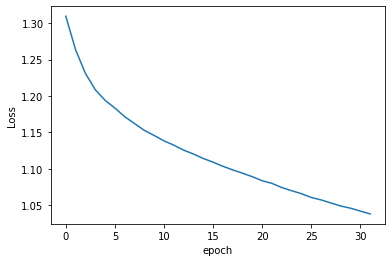

In [34]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [35]:
# trains the model:
epochs = 64
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs.long())
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.03473556
epoch:  26 loss: 0.95594031
epoch:  51 loss: 0.89067841
epoch:  76 loss: 0.84543753
epoch: 101 loss: 0.82051420
epoch: 126 loss: 0.80636108
epoch: 151 loss: 0.79778278
epoch: 176 loss: 0.79255509
epoch: 201 loss: 0.78808850
epoch: 226 loss: 0.78488004
epoch: 251 loss: 0.78193212
epoch: 276 loss: 0.77917343
epoch: 300 loss: 0.7758900523


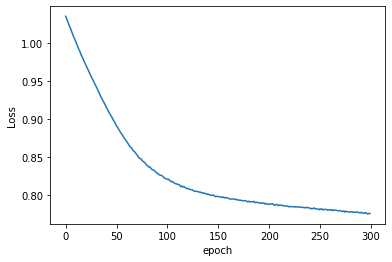

In [42]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [41]:
# Making Predictions on the test class and prints the cross entropy loss for the test data

#with torch.no_grad():
 #   y_val = model(categorical_test_data, numerical_test_data)
  #  loss = loss_function(y_val, test_outputs.long)
#print(f'Loss: {loss:.8f}')

In [37]:
# It is important to note that since we specified that our output layer will contain 2 neurons, each prediction will contain 3 values. For instance, the first 5 predicted values look like this:
print(y_val[:5])

tensor([[ 0.9556,  0.4886, -1.9719],
        [ 0.7935,  0.5638, -0.9722],
        [ 0.5905,  0.3938, -1.5042],
        [ 0.8398,  0.6466, -1.3540],
        [ 0.7178,  0.5976, -1.2209]])


In [38]:
y_val = np.argmax(y_val, axis=1)

In [39]:
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[143416  36474   1558]
 [ 50351  46990    876]
 [ 25623   4057   5227]]
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.72    181448
         1.0       0.54      0.48      0.51     98217
         2.0       0.68      0.15      0.25     34907

    accuracy                           0.62    314572
   macro avg       0.62      0.47      0.49    314572
weighted avg       0.62      0.62      0.60    314572

0.6219021400506084
